In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./google_stock_data.csv')
df.head()

,Date,Close,High,Low,Open,Volume
0,2004-08-19,2.484366,2.576470,2.375919,2.475947,897427216
1,2004-08-20,2.681699,2.700763,2.488327,2.500954,458857488
2,2004-08-23,2.708686,2.809705,2.700021,2.742112,366857939
3,2004-08-24,2.596526,2.763156,2.564338,2.754243,306396159
4,2004-08-25,2.624504,2.674023,2.572014,2.598754,184645512


In [3]:
df.shape

(5236, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5236 entries, 0 to 5235
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5236 non-null   object 
 1   Close   5236 non-null   float64
 2   High    5236 non-null   float64
 3   Low     5236 non-null   float64
 4   Open    5236 non-null   float64
 5   Volume  5236 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 245.6+ KB


In [5]:
pd.isnull(df)

,Date,Close,High,Low,Open,Volume
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
5231,False,False,False,False,False,False
5232,False,False,False,False,False,False
5233,False,False,False,False,False,False
5234,False,False,False,False,False,False


In [6]:
pd.isnull(df).sum()

Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [7]:
df = df.astype({
    'Close': 'int',
    'High': 'int',
    'Low': 'int',
    'Open': 'int'
})

In [8]:
df['Close'].dtype

dtype('int32')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5236 entries, 0 to 5235
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    5236 non-null   object
 1   Close   5236 non-null   int32 
 2   High    5236 non-null   int32 
 3   Low     5236 non-null   int32 
 4   Open    5236 non-null   int32 
 5   Volume  5236 non-null   int64 
dtypes: int32(4), int64(1), object(1)
memory usage: 163.8+ KB


In [10]:
df.columns

Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [11]:
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

In [12]:
X = df[features]
y = df[target]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [14]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [15]:
from xgboost import XGBRegressor

In [16]:
xgb_model = XGBRegressor(n_estimators=100)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

In [17]:
def evaluate(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} — MSE: {mse:.2f}, R²: {r2:.2f}")

evaluate(y_test, rf_pred, "Random Forest")
evaluate(y_test, xgb_pred, "XGBoost")

Random Forest — MSE: 1358.57, R²: -0.81
XGBoost — MSE: 1338.28, R²: -0.78


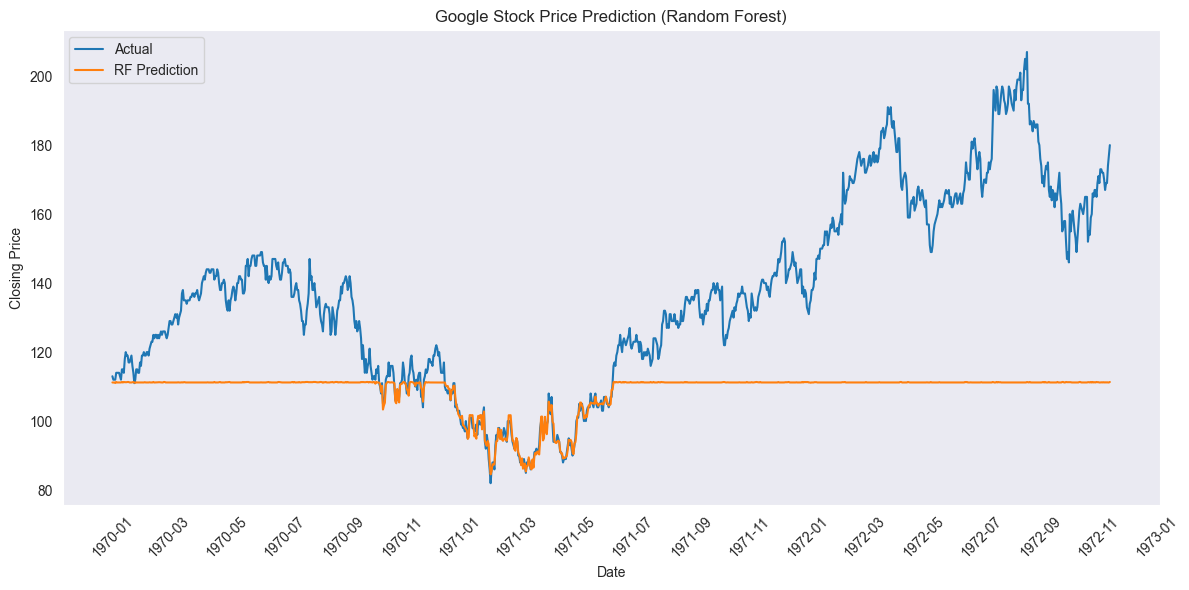

In [18]:
import matplotlib.dates as mdates

plt.figure(figsize=(12,6))
plt.plot(df['Date'].iloc[-len(y_test):], y_test.values, label='Actual')
plt.plot(df['Date'].iloc[-len(y_test):], rf_pred, label='RF Prediction')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # adjust interval if needed
plt.xticks(rotation=45)

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Google Stock Price Prediction (Random Forest)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()